In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_colwidth', -1)

In [3]:
ed_country = pd.read_csv("~\Desktop\dss_sp19\EdStatsCountry.csv")

In [4]:
ed_data = pd.read_csv("~\Desktop\dss_sp19\EdStatsData.csv")

In [5]:
region_count = ed_country.groupby("Region").size()
region_count

Region
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                 3 
South Asia                    8 
Sub-Saharan Africa            48
dtype: int64

In [6]:
by_region = ed_country.sort_values("Region")[["Country Code", "Short Name", "Region", "Income Group"]]
only_east_asia = by_region[by_region["Region"] == "East Asia & Pacific"]

In [7]:
countries_to_2017 = ed_data.iloc[:, :52] #table went all the way to 2100, so I took out the years that have not occurred yet
countries_to_2017.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN


In [8]:
us_data = countries_to_2017[countries_to_2017['Country Code'] == 'USA']
us_data = us_data.drop(columns=["Country Name", "Country Code", "Indicator Code"]) #without "U.S." label
us_row_counts = us_data.apply(lambda x: x.count(), axis=1) #number of data points in row
us_data['Row Count'] = us_row_counts
us_data = us_data[us_data['Row Count'] > 40] #rows with more than 40 data points

In [9]:
china_data = countries_to_2017[countries_to_2017['Country Code'] == 'CHN']
china_data = china_data.drop(columns=["Country Name", "Country Code", "Indicator Code"]) #without "China" label
china_row_counts = china_data.apply(lambda x: x.count(), axis=1)
china_data['Row Count'] = china_row_counts
china_data = china_data[china_data['Row Count'] > 40]
china_data_w_row_count = china_data #with row count
china_data = china_data.drop(columns=["Row Count"]) #dropped row count column

In [10]:
china_primary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in primary education, both sexes (number)'].transpose()
#transposed to make the rows years

china_primary_enroll = china_primary_enroll.rename(columns={243073: "Enrollment in primary education, both sexes (number)"})
#renamed column

china_primary_enroll = china_primary_enroll.drop(["Indicator Name"])
#dropped row with indicator name

In [11]:
china_secondary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'].transpose()
china_secondary_enroll = china_secondary_enroll.rename(columns={243081: "Enrollment in secondary education, both sexes (number)"})
china_secondary_enroll = china_secondary_enroll.drop(["Indicator Name"])

In [12]:
china_tertiary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'].transpose()
china_tertiary_enroll = china_tertiary_enroll.rename(columns={243094: "Enrollment in tertiary education, all programmes, both sexes (number)"})
china_tertiary_enroll = china_tertiary_enroll.drop(["Indicator Name"])

In [13]:
china_primary_secondary = china_primary_enroll.merge(china_secondary_enroll, left_index=True, right_index=True)
china_enroll_all_levels = china_primary_secondary.merge(china_tertiary_enroll, left_index=True, right_index=True)

In [14]:
china_gdp_per_capita = china_data[china_data['Indicator Name'] == 'GDP per capita (current US$)'].transpose()
china_gdp_per_capita = china_gdp_per_capita.rename(columns={243135: "GDP per capita (current US$)"})
china_gdp_per_capita = china_gdp_per_capita.drop(["Indicator Name"])

In [15]:
china_enrollment_and_gdp = china_gdp_per_capita.merge(china_enroll_all_levels, left_index=True, right_index=True)
china_enrollment_and_gdp = china_enrollment_and_gdp.dropna(axis=0, how="any") #no nan
china_enrollment_and_gdp["Year"] = china_enrollment_and_gdp.index #made year into a column instead of the indices
china_enrollment_and_gdp = china_enrollment_and_gdp[["Year", 
                          "GDP per capita (current US$)", 
                          "Enrollment in primary education, both sexes (number)", 
                          "Enrollment in secondary education, both sexes (number)", 
                          "Enrollment in tertiary education, all programmes, both sexes (number)"]] #made Year column first
china_enrollment_and_gdp.head()

,Year,GDP per capita (current US$),"Enrollment in primary education, both sexes (number)","Enrollment in secondary education, both sexes (number)","Enrollment in tertiary education, all programmes, both sexes (number)"
1970,1970,113.163,1.00668e+08,2.02534e+07,108617
1973,1973,157.09,1.25492e+08,3.61669e+07,193719
1974,1974,160.14,1.35704e+08,3.49468e+07,313645
1975,1975,178.342,1.44814e+08,3.71379e+07,429981
1976,1976,165.406,1.50941e+08,4.53684e+07,500993


([<matplotlib.axis.XTick at 0x15e9f87df28>,
 <a list of 10 Text xticklabel objects>)

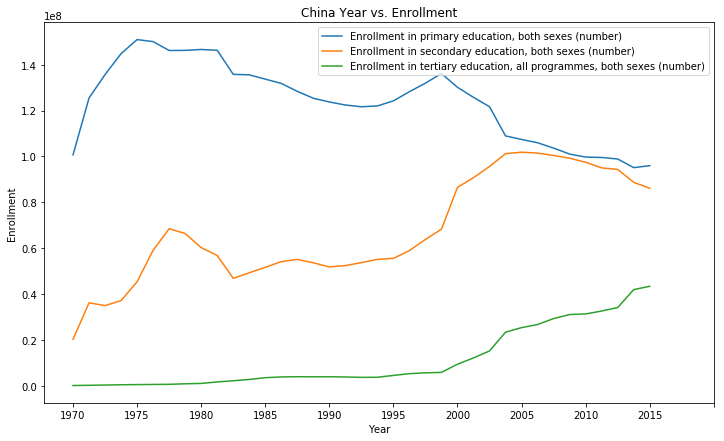

In [60]:
enrollment_x_labels = ["1970", "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015"]
only_china_enrollment = china_enrollment_and_gdp.drop(columns=["GDP per capita (current US$)"])
only_china_enrollment.plot("Year", figsize=(12,7))
plt.title('China Year vs. Enrollment')
plt.ylabel("Enrollment")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40], labels=enrollment_x_labels)